In [1]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /home/ucloud/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:stats’:

    rstudent




In [2]:
library(rstan)

In [3]:
library(cmdstanr)

In [4]:
resize_plot <- function(x,y){ options(repr.plot.width=x, repr.plot.height=y) }

In [5]:
options(mc.cores = parallel::detectCores())

In [6]:
#rebuild_cmdstan()

# Over-dispersed counts

## Beta binomial

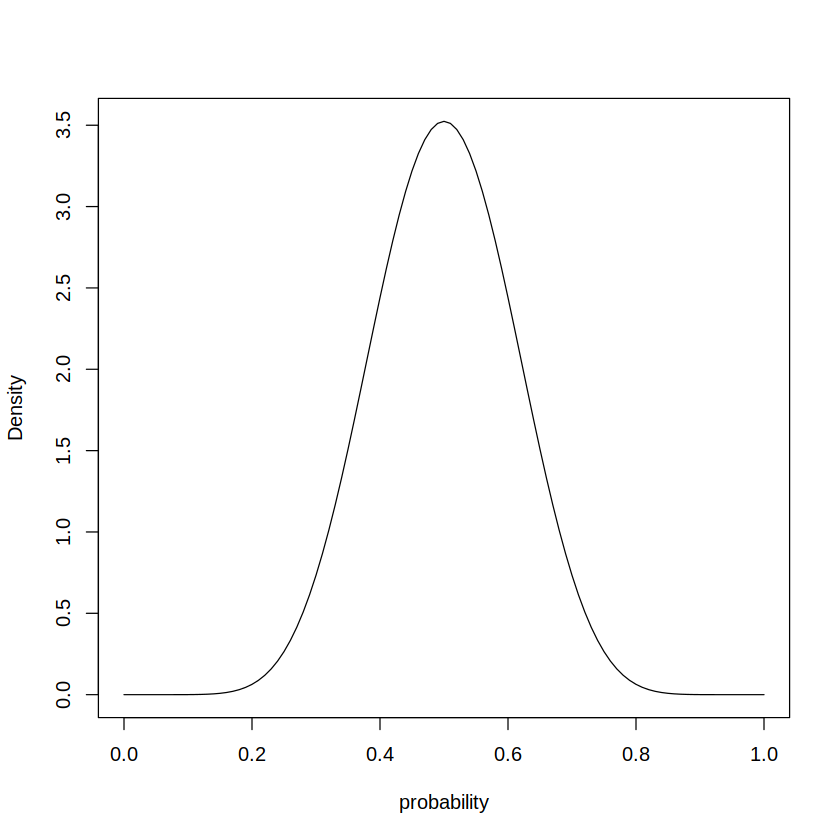

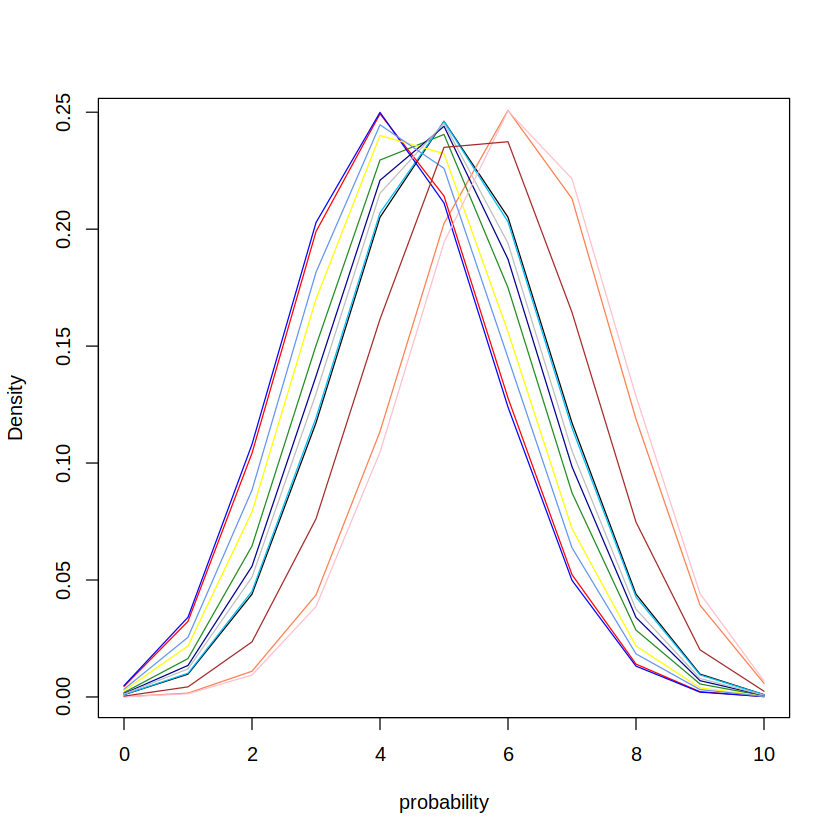

In [7]:
pbar <- 0.5
theta <- 20
curve( dbeta2(x,pbar,theta) , from=0 , to=1 ,
    xlab="probability" , ylab="Density" )
curve( dbinom(x,10,prob=pbar) , from=0 , to=10 , n=11,
    xlab="probability" , ylab="Density")
color=c('coral','forestgreen','deepskyblue1','red', 'blue', 'yellow', 'dark blue', 'grey', 'pink', 'cornflowerblue', 'brown')
for(i in 0:10){
    curve( dbinom(x,10,prob=rbeta2(1,pbar,theta)) , from=0 , to=10 , n=11,
    xlab="probability" , ylab="Density", col=color[i+1], add=T)
    }

In [8]:
data(UCBadmit)
d <- UCBadmit

In [9]:
d

,dept,applicant.gender,admit,reject,applications
,<fct>,<fct>,<int>,<int>,<int>
1,A,male,512,313,825
2,A,female,89,19,108
3,B,male,353,207,560
4,B,female,17,8,25
5,C,male,120,205,325
6,C,female,202,391,593
7,D,male,138,279,417
8,D,female,131,244,375
9,E,male,53,138,191


In [10]:
d$gid <- ifelse( d$applicant.gender=="male" , 1L , 2L )
dat <- list( A=d$admit , N=d$applications , gid=d$gid )

In [11]:
dat

$A
 [1] 512  89 353  17 120 202 138 131  53  94  22  24

$N
 [1] 825 108 560  25 325 593 417 375 191 393 373 341

$gid
 [1] 1 2 1 2 1 2 1 2 1 2 1 2

$pbar$ is the probability of admission, $\theta$ gives the flatness of the distribution and we keep it above 2 to remove distributions concentrated on 0,1

In [13]:
m12.1 <- ulam(
    alist(
        A ~ dbetabinom( N , pbar , theta ),
        logit(pbar) <- a[gid],
        a[gid] ~ dnorm( 0 , 1.5 ),
        transpars> theta <<- phi + 2.0, #"transpars" will be output as sample
        phi ~ dexp(1)
    ), data=dat , chains=4, cores=1 )

Warning in '/tmp/Rtmpm7glCl/model-3222a81873.stan', line 2, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/Rtmpm7glCl/model-3222a81873.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/Rtmpm7glCl/model-3222a81873.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc




Running MCMC with 4 sequential chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.3 seconds.
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: beta_binomial_lpmf: Second prior sample size parameter[2] is 0, but must be positive finite! (in '/tmp/Rtmpm7glCl/model-3222a81873.stan', line 22, column 4 to column 57)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.3 seconds.
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: beta_binomial_lpmf: Second prior sample size parameter[2] is 0, but must be positive finite! (in '/tmp/Rtmpm7glCl/model-3222a81873.stan', line 22, column 4 to column 57)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 finished in 0.5 seconds.
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: beta_binomial_lpmf: Second prior sample size parameter[1] is 0, but must be positive finite! (in '/tmp/Rtmpm7glCl/model-3222a81873.stan', line 22, column 4 to column 57)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 finished in 0.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.4 seconds.
Total execution time: 2.4 seconds.



In [14]:
post <- extract.samples( m12.1 )
post$da <- post$a[,1] - post$a[,2]

In [15]:
str(post)

List of 4
 $ a    : num [1:2000, 1:2] 0.297 -0.63 -0.842 -0.227 -0.287 ...
 $ phi  : num [1:2000(1d)] 0.00642 0.03049 1.62573 0.57927 1.01649 ...
 $ theta: num [1:2000(1d)] 2.01 2.03 3.63 2.58 3.02 ...
 $ da   : num [1:2000] -0.9947 -0.2739 -0.6968 -0.4987 -0.0125 ...
 - attr(*, "source")= chr "ulam posterior: 2000 samples from object"


The effect of different departments is removed by modeling the variation between them. Each observed data point has its own model for probability of admission with an intercept.

In [16]:
precis( post , depth=2 )

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
a[1],-0.41659264,0.4065208,-1.07570180,0.2218126,▁▁▅▇▂▁
a[2],-0.34716911,0.4179653,-1.03262410,0.3060306,▁▁▅▇▃▁▁
phi,1.04398678,0.8201182,0.08511032,2.5681200,▇▇▅▃▂▁▁▁▁▁▁▁
theta,3.04398678,0.8201182,2.08511425,4.5681200,▇▇▅▃▂▁▁▁▁▁▁▁
da,-0.06942353,0.5586611,-0.97795323,0.8131340,▁▁▃▇▇▃▁▁


In [17]:
mean(inv_logit(post$a[,d$gid]))

[1] 0.409344

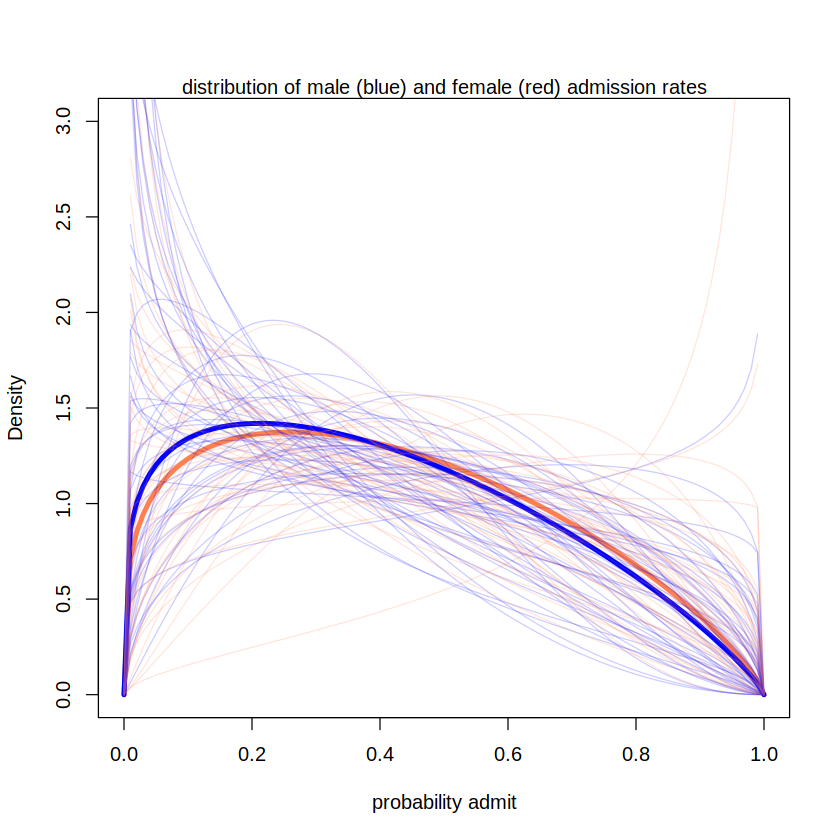

In [18]:
F_id <- 2
M_id <- 1

# draw posterior mean beta distribution
curve( dbeta2(x,mean(inv_logit(post$a[,F_id])),mean(post$theta)) , from=0 , to=1 ,
    ylab="Density" , xlab="probability admit", ylim=c(0,3) , lwd=4, col="coral" )
curve( dbeta2(x,mean(inv_logit(post$a[,M_id])),mean(post$theta)) , from=0 , to=1 ,
    ylab="Density" , xlab="probability admit", ylim=c(0,3) , lwd=4, col="blue",
     add=T)
# draw 50 beta distributions sampled from posterior
for ( i in 1:50 ) {
    p_F <- logistic( post$a[i,F_id] )
    p_M <- logistic( post$a[i,M_id] )
    theta <- post$theta[i]
    curve( dbeta2(x,p_F,theta) , add=TRUE , col=col.alpha("coral",0.2) )
    curve( dbeta2(x,p_M,theta) , add=TRUE , col=col.alpha("blue",0.2) )
}
mtext( "distribution of male (blue) and female (red) admission rates" )

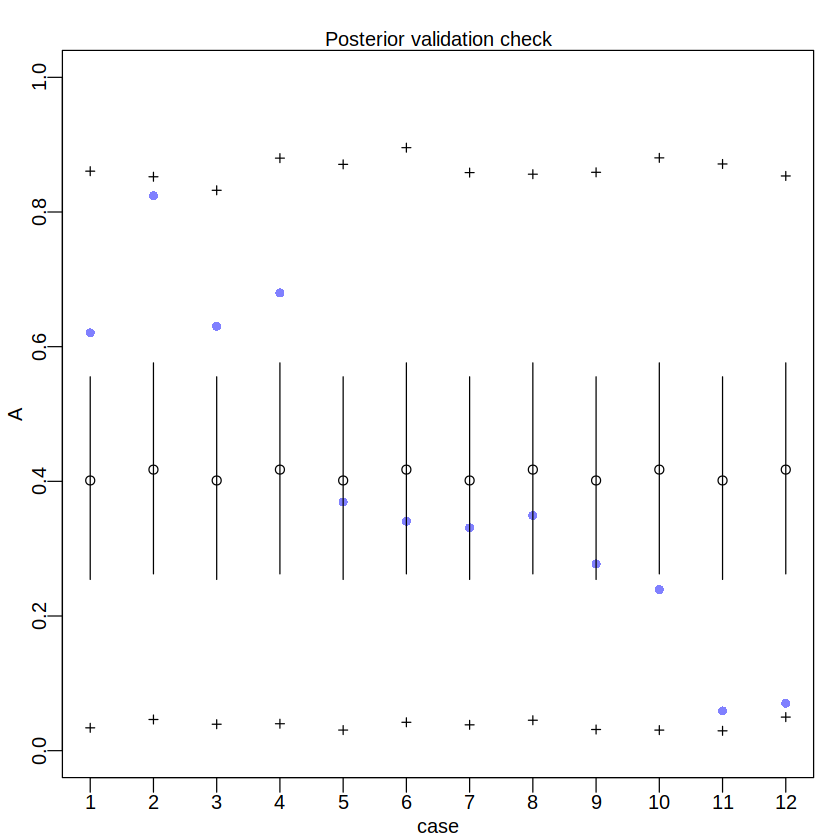

In [19]:
postcheck( m12.1 )

## Negative-binomial or gamma-Poisson

In [32]:
data(Kline)
d <- Kline

In [33]:
d

culture,population,contact,total_tools,mean_TU
<fct>,<int>,<fct>,<int>,<dbl>
Malekula,1100,low,13,3.2
Tikopia,1500,low,22,4.7
Santa Cruz,3600,low,24,4.0
Yap,4791,high,43,5.0
Lau Fiji,7400,high,33,5.0
Trobriand,8000,high,19,4.0
Chuuk,9200,high,40,3.8
Manus,13000,low,28,6.6
Tonga,17500,high,55,5.4


In [34]:
d$P <- standardize( log(d$population) )
d$contact_id <- ifelse( d$contact=="high" , 2L , 1L )

In [54]:
dat2 <- list(
    T = d$total_tools,
    P = d$population,
    cid = d$contact_id )

In [55]:
dat2

$T
 [1] 13 22 24 43 33 19 40 28 55 71

$P
 [1]   1100   1500   3600   4791   7400   8000   9200  13000  17500 275000

$cid
 [1] 1 1 1 2 2 2 2 1 2 1

In [95]:
m12.2 <- ulam(
    alist(
        T ~ dgampois( lambda, phi ),
        lambda <- exp(a[cid]) * P^b[cid] / g,
        a[cid] ~ dnorm(1,1),
        b[cid] ~ dexp(1),
        g ~ dexp(1),
        phi ~ dexp(1)
    ), data=dat2 , chains=4 , cores=4, log_lik=TRUE )

Warning in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpnHqdLK/model-1111677701c48.stan', line 2, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpnHqdLK/model-1111677701c48.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpnHqdLK/model-1111677701c48.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword bef

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: neg_binomial_2_lpmf: Precision parameter is 0, but must be positive finite! (in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpnHqdLK/model-1111677701c48.stan', line 21, column 4 to column 39)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: neg_binomial_2_lpmf: Location parameter[1] is inf, but must be positive finite! (in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpnHqdLK/model-1111677701c48.stan', line 21, column 4 to column 39)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: neg_binomial_2_lpmf: Location parameter[1] is inf, but must be positive finite! (in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpnHqdLK/model-1111677701c48.stan', line 21, column 4 to column 39)

Chain 2 If this warning occurs sporadically,

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: neg_binomial_2_lpmf: Location parameter[4] is inf, but must be positive finite! (in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpnHqdLK/model-1111677701c48.stan', line 21, column 4 to column 39)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: neg_binomial_2_lpmf: Location parameter[4] is inf, but must be positive finite! (in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpnHqdLK/model-1111677701c48.stan', line 21, column 4 to column 39)

Chain 3 If this warning occurs sporadically,

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: neg_binomial_2_lpmf: Location parameter[1] is inf, but must be positive finite! (in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpnHqdLK/model-1111677701c48.stan', line 21, column 4 to column 39)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: neg_binomial_2_lpmf: Location parameter[1] is inf, but must be positive finite! (in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpnHqdLK/model-1111677701c48.stan', line 21, column 4 to column 39)

Chain 4 If this warning occurs sporadically,

Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: neg_binomial_2_lpmf: Location parameter[4] is inf, but must be positive finite! (in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpnHqdLK/model-1111677701c48.stan', line 21, column 4 to column 39)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iterati

In [97]:
precis(m12.2, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.9114767,0.8014666,-0.36727880,2.2160760,1368.5327,0.9997255
a[2],1.0328261,0.9396153,-0.45050494,2.5595850,1032.8253,1.0005141
b[1],0.2504790,0.0976976,0.10093824,0.4143388,1044.6992,1.0023930
b[2],0.2655451,0.1285123,0.05890325,0.4849785,746.0879,1.0000460
g,1.0735000,0.8358005,0.21354347,2.5764461,1130.1564,0.9994555
phi,3.6351828,1.7114820,1.41396080,6.7251522,1410.2496,1.0005663


Warning message in polygon(x, y, col = col, border = border, ...):
“"alpha" is not a graphical parameter”


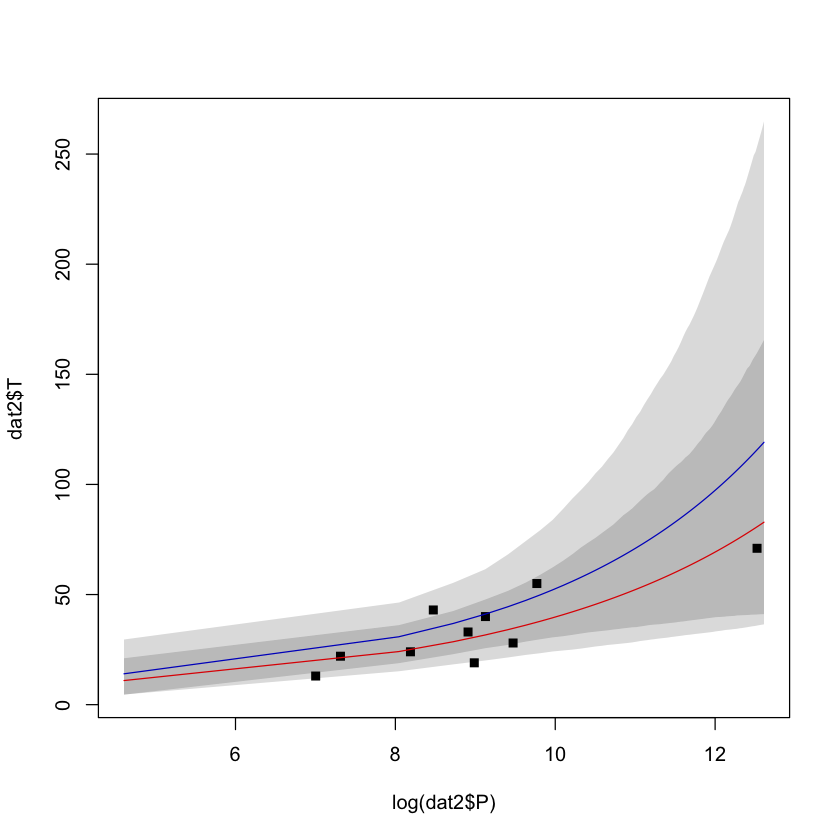

In [98]:
ns <- 100
pop_seq <- seq( from=100 , to=300000 , length.out=ns )
# 1.53 is sd of log(population)
# 9 is mean of log(population)


lambda <- link( m12.2 , data=data.frame( P=pop_seq , cid=2 ) )

lmu <- apply( lambda , 2 , mean )
lci <- apply( lambda , 2 , PI )
plot( log(dat2$P), dat2$T, pch=15, lwd=2, ylim=range(lci), xlim=range(log(pop_seq)) )
lines( log(pop_seq) , lmu , type="l" , col="blue" )
shade( lci , log(pop_seq) , xpd=TRUE )

lambda <- link( m12.2 , data=data.frame( P=pop_seq , cid=1 ) )

lmu <- apply( lambda , 2 , mean )
lci <- apply( lambda , 2 , PI )
lines( log(pop_seq) , lmu , type="l" , col="red" )
shade( lci , log(pop_seq) , xpd=TRUE, alpha=.5 )

Posterior predictions for samples inside the data to fit

In [102]:
S <- extract.samples(m12.2, n = 20)

In [161]:
str(S)

List of 4
 $ a  : num [1:20, 1:2] -0.481 -0.181 0.238 1.268 -0.392 ...
 $ b  : num [1:20, 1:2] 0.452 0.266 0.189 0.219 0.369 ...
 $ g  : num [1:20(1d)] 1.399 0.303 0.146 1.087 1.027 ...
 $ phi: num [1:20(1d)] 4.18 2.58 1.8 5.32 2.4 ...
 - attr(*, "source")= chr "ulam posterior: 20 samples from object"


In [192]:
f <- function(a, b, g, phi, P, T){ 
        lambda = exp(a) * P^b / g
        dgampois( mu=lambda, scale=phi, x=T, log = F )
                            }
x1=matrix(NA, nrow = 20,ncol = 10)
x2=matrix(NA, nrow = 20,ncol = 10)
for(i in 1:20){
    for(j in 1:10){
    x1[i,j]= f(S$a[i,1], S$b[i,1], S$g[i], S$phi[i], d$population[j], d$total_tools[j])
    x2[i,j]= f(S$a[i,2], S$b[i,2], S$g[i], S$phi[i], d$population[j], d$total_tools[j])
        }
    }

In [198]:
mu1 <- rowMeans( apply(x1, 1, function(y) y/sum(y)) )

In [199]:
mu2 <- rowMeans( apply(x2, 1, function(y) y/sum(y)) )

In [168]:
mu1 <- colMeans( x1 )

In [169]:
mu2 <- colMeans( x2 )

In [200]:
d$pLow <- mu1/(mu1+mu2)
d$pHigh <- mu2/(mu1+mu2)

In [201]:
d

culture,population,contact,total_tools,mean_TU,P,contact_id,prob1,prob2
<fct>,<int>,<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
Malekula,1100,low,13,3.2,-1.291473310,1,0.5581940,0.4418060
Tikopia,1500,low,22,4.7,-1.088550750,1,0.4451766,0.5548234
Santa Cruz,3600,low,24,4.0,-0.515764892,1,0.4977315,0.5022685
Yap,4791,high,43,5.0,-0.328773359,2,0.3112271,0.6887729
Lau Fiji,7400,high,33,5.0,-0.044338980,2,0.4782823,0.5217177
Trobriand,8000,high,19,4.0,0.006668287,2,0.6764955,0.3235045
Chuuk,9200,high,40,3.8,0.098109204,2,0.4339817,0.5660183
Manus,13000,low,28,6.6,0.324317564,1,0.6077779,0.3922221
Tonga,17500,high,55,5.4,0.518797917,2,0.3425494,0.6574506


In [203]:
library(scatterpie)

In [235]:
resize_plot(6,4)

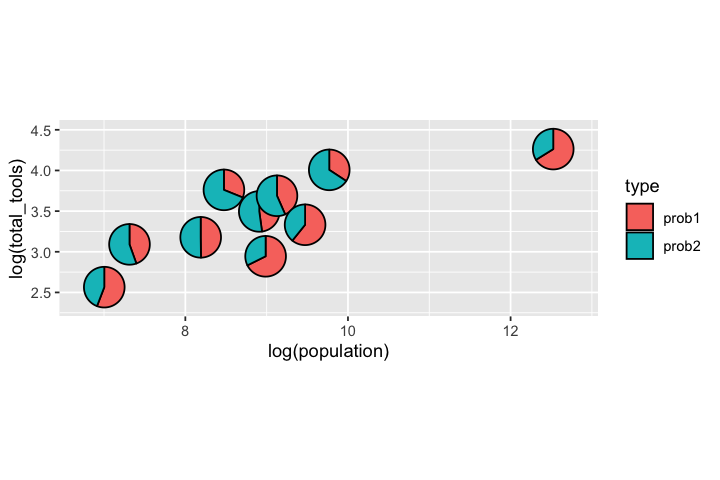

In [236]:
ggplot() +
   geom_scatterpie(aes(x = log(population), y = log(total_tools), r=.25), data = d, cols = c("prob1", "prob2"))+
   coord_fixed()

# Zero inflated poisson

In [4]:
# define parameters
prob_drink <- 0.2 # 20% of days
rate_work <- 1    # average 1 manuscript per day
# sample one year of production
N <- 365
# simulate days monks drink
set.seed(365)
drink <- rbinom( N , 1 , prob_drink )
# simulate manuscripts completed
y <- (1-drink)*rpois( N , rate_work )

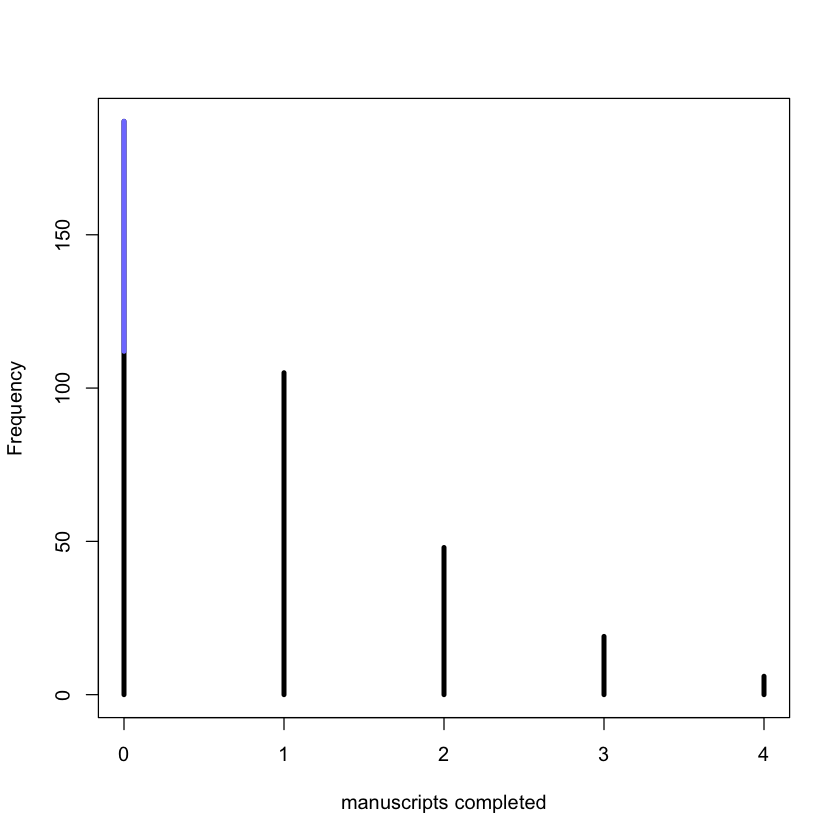

In [5]:
simplehist( y , xlab="manuscripts completed" , lwd=4 )
zeros_drink <- sum(drink)
zeros_work <- sum(y==0 & drink==0)
zeros_total <- sum(y==0)
lines( c(0,0) , c(zeros_work,zeros_total) , lwd=4 , col=rangi2 )

In [6]:
m12.3 <- ulam(
    alist(
        y ~ dzipois( p , lambda ),
        logit(p) <- ap,
        log(lambda) <- al,
        ap ~ dnorm( -1.5 , 1 ),
        al ~ dnorm( 1 , 0.5 )
    ) , data=list(y=y) , chains=4 )
precis( m12.3 )

Trying to compile a simple C file



Running /Users/au612681/opt/anaconda3/envs/stat_rethinking_2/lib/R/bin/R CMD \
  SHLIB foo.c
x86_64-apple-darwin13.4.0-clang -I"/Users/au612681/opt/anaconda3/envs/stat_rethinking_2/lib/R/include" -DNDEBUG   -D_FORTIFY_SOURCE=2 -isystem /Users/au612681/opt/anaconda3/envs/stat_rethinking_2/include -mmacosx-version-min=10.9 -I/Users/au612681/opt/anaconda3/envs/stat_rethinking_2/include   -fPIC  -march=core2 -mtune=haswell -mssse3 -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -isystem /Users/au612681/opt/anaconda3/envs/stat_rethinking_2/include -fdebug-prefix-map=/Users/runner/miniforge3/conda-bld/r-base-split_1639563465184/work=/usr/local/src/conda/r-base-4.1.2 -fdebug-prefix-map=/Users/au612681/opt/anaconda3/envs/stat_rethinking_2=/usr/local/src/conda-prefix  -c foo.c -o foo.o
x86_64-apple-darwin13.4.0-clang -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -L/Users/au612681/opt/anaconda3/envs/stat_rethinkin

ERROR: Error in compileCode(f, code, language = language, verbose = verbose):                              ^18 warnings generated.ld: warning: -pie being ignored. It is only used when linking a main executableld: unsupported tapi file type '!tapi-tbd' in YAML file '/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/System/Library/Frameworks//CoreFoundation.framework/CoreFoundation.tbd' for architecture x86_64clang-12: error: linker command failed with exit code 1 (use -v to see invocation)make: *** [/Users/au612681/opt/anaconda3/envs/stat_rethinking_2/lib/R/share/make/shlib.mk:10: fileb8ff3b41076f.dylib] Error 1


ERROR: Error in sink(type = "output"): invalid connection


In [5]:
data(chimpanzees)
d <- chimpanzees

In [6]:
d$treatment <- 1 + d$prosoc_left + 2*d$condition

In [7]:
xtabs( ~ treatment + prosoc_left + condition , d )

, , condition = 0

         prosoc_left
treatment   0   1
        1 126   0
        2   0 126
        3   0   0
        4   0   0

, , condition = 1

         prosoc_left
treatment   0   1
        1   0   0
        2   0   0
        3 126   0
        4   0 126


In [9]:
# prior trimmed data list
dat_list <- list(
    pulled_left = d$pulled_left,
    actor = d$actor,
    treatment = as.integer(d$treatment) )

In [10]:
m11.4 <- ulam(
    alist(
        pulled_left ~ dbinom( 1 , p ) ,
        logit(p) <- a[actor] + b[treatment] ,
        a[actor] ~ dnorm( 0 , 1.5 ),
        b[treatment] ~ dnorm( 0 , 0.5 )
    ) , data=dat_list , chains=4 , log_lik=TRUE )
precis( m11.4 , depth=2 )

Warning in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpiblJe3/model-12d1c5c3c1bee.stan', line 2, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpiblJe3/model-12d1c5c3c1bee.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpiblJe3/model-12d1c5c3c1bee.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword bef

Running MCMC with 4 sequential chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.9 seconds.
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 5

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.43933635,0.3124703,-0.94782361,0.05746266,713.8008,1.0016040
a[2],3.92061151,0.7896357,2.77999430,5.32354125,1001.4763,1.0015753
a[3],-0.74418509,0.3206769,-1.27384120,-0.22176459,772.5383,1.0012394
a[4],-0.74580676,0.3278306,-1.26750060,-0.22258890,764.9205,1.0014733
a[5],-0.44500752,0.3144235,-0.95778124,0.04579499,755.8020,1.0007650
a[6],0.47139510,0.3203926,-0.04025997,0.99057220,821.6396,0.9997599
a[7],1.95632731,0.4179766,1.29075720,2.63109915,1100.5910,1.0004075
b[1],-0.04098077,0.2748321,-0.47273532,0.39087790,699.2997,0.9998430
b[2],0.47872456,0.2727184,0.05013758,0.91434610,756.9337,1.0028853


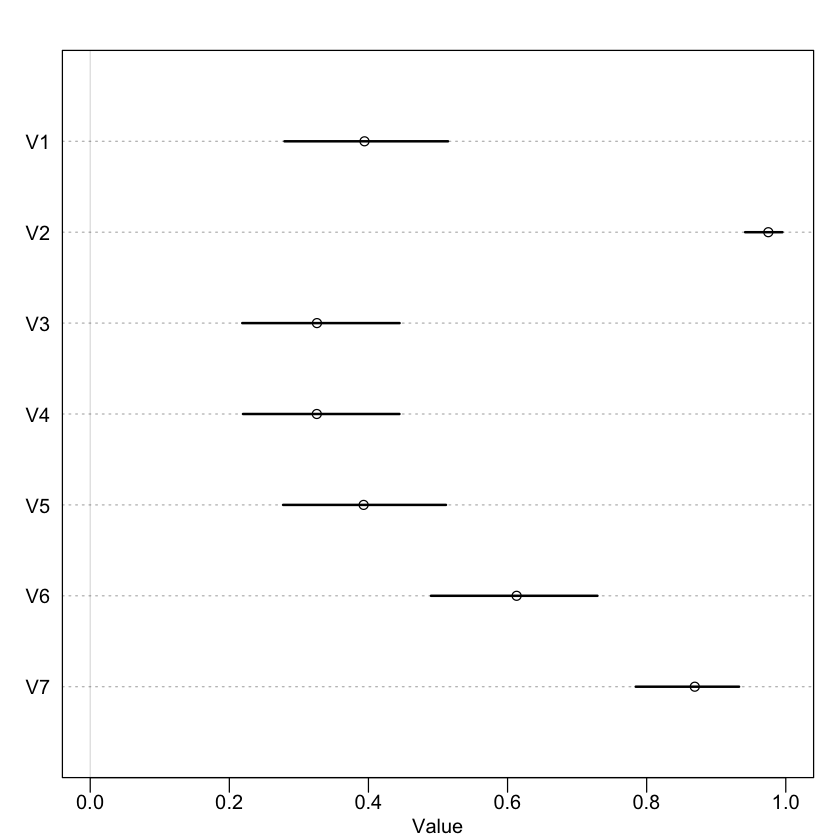

In [11]:
post <- extract.samples(m11.4)
p_left <- inv_logit( post$a )
plot( precis( as.data.frame(p_left) ) , xlim=c(0,1) )

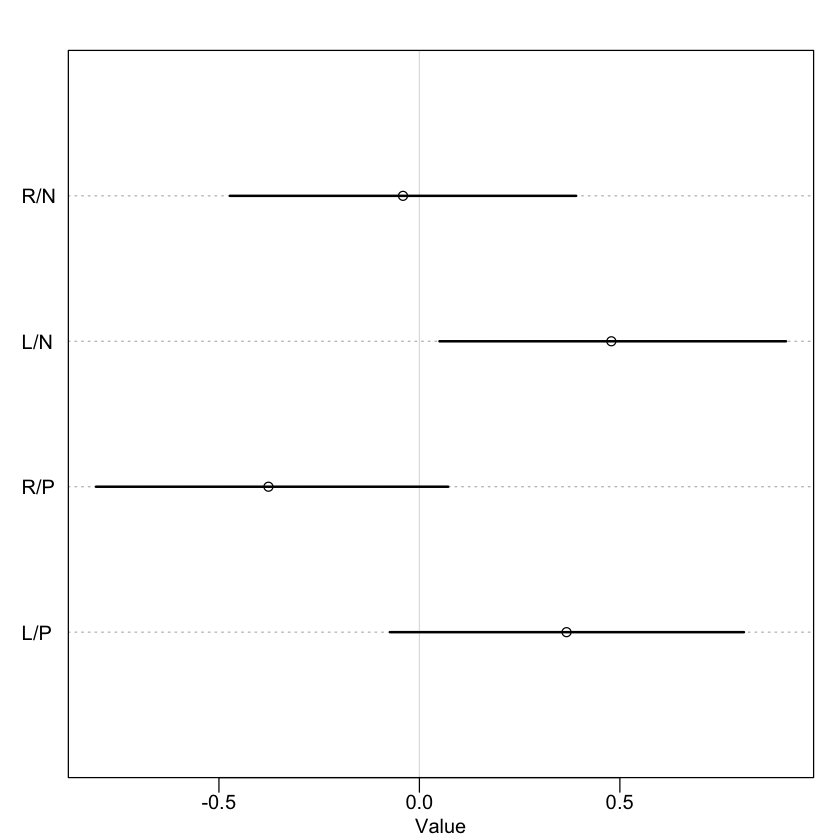

In [12]:
labs <- c("R/N","L/N","R/P","L/P")
plot( precis( m11.4 , depth=2 , pars="b" ) , labels=labs )

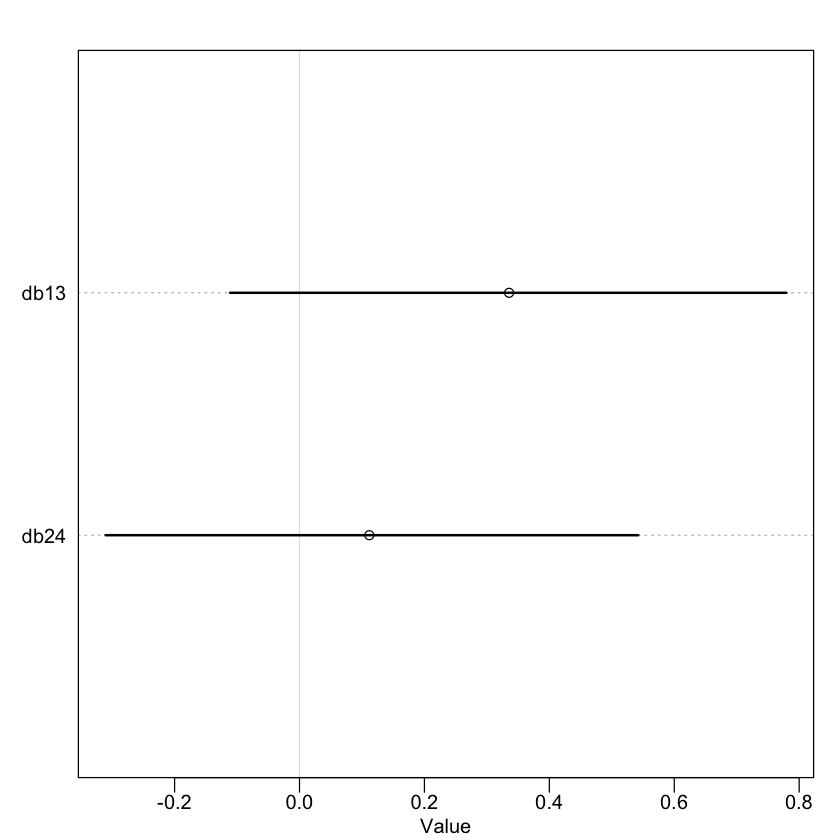

In [13]:
diffs <- list(
    db13 = post$b[,1] - post$b[,3],
    db24 = post$b[,2] - post$b[,4] )
plot( precis(diffs) )

In [15]:
m11.4q <- quap(
    alist(
        pulled_left ~ dbinom( 1 , p ) ,
        logit(p) <- a[actor] + b[treatment] ,
        a[actor] ~ dnorm( 0 , 1.5 ),
        b[treatment] ~ dnorm( 0 , 0.5 )
    ) , data=dat_list)
precis( m11.4q , depth=2 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.43918497,0.3276018,-0.96275587,0.08438593
a[2],3.70607426,0.7217471,2.55258296,4.85956557
a[3],-0.73272874,0.3329757,-1.26488821,-0.20056927
a[4],-0.73273285,0.3329758,-1.26489249,-0.20057322
a[5],-0.43918104,0.3276017,-0.96275186,0.08438978
a[6],0.46897823,0.3317748,-0.06126193,0.99921839
a[7],1.90509984,0.4136450,1.24401528,2.56618440
b[1],-0.04068522,0.2837320,-0.49414371,0.41277326
b[2],0.47211223,0.2842163,0.01787970,0.92634476


In [16]:
precis( m11.4 , depth=2 )

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.43933635,0.3124703,-0.94782361,0.05746266,713.8008,1.0016040
a[2],3.92061151,0.7896357,2.77999430,5.32354125,1001.4763,1.0015753
a[3],-0.74418509,0.3206769,-1.27384120,-0.22176459,772.5383,1.0012394
a[4],-0.74580676,0.3278306,-1.26750060,-0.22258890,764.9205,1.0014733
a[5],-0.44500752,0.3144235,-0.95778124,0.04579499,755.8020,1.0007650
a[6],0.47139510,0.3203926,-0.04025997,0.99057220,821.6396,0.9997599
a[7],1.95632731,0.4179766,1.29075720,2.63109915,1100.5910,1.0004075
b[1],-0.04098077,0.2748321,-0.47273532,0.39087790,699.2997,0.9998430
b[2],0.47872456,0.2727184,0.05013758,0.91434610,756.9337,1.0028853


In [4]:
library(MASS)


In [5]:
data("eagles")
d <- eagles

In [6]:
d

,y,n,P,A,V
,<int>,<int>,<fct>,<fct>,<fct>
1,17,24,L,A,L
2,29,29,L,A,S
3,17,27,L,I,L
4,20,20,L,I,S
5,1,12,S,A,L
6,15,16,S,A,S
7,0,28,S,I,L
8,1,4,S,I,S


In [7]:
d$P <- as.integer(d$P)
d$A <- as.integer(d$A)
d$V <- as.integer(d$V)

In [8]:
d

,y,n,P,A,V
,<int>,<int>,<int>,<int>,<int>
1,17,24,1,1,1
2,29,29,1,1,2
3,17,27,1,2,1
4,20,20,1,2,2
5,1,12,2,1,1
6,15,16,2,1,2
7,0,28,2,2,1
8,1,4,2,2,2


In [9]:
d$P = ifelse(d$P==1, 1, -1)
d$A = ifelse(d$A==1, 1, -1)
d$V = ifelse(d$V==1, 1, -1)

In [10]:
d

,y,n,P,A,V
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,17,24,1,1,1
2,29,29,1,1,-1
3,17,27,1,-1,1
4,20,20,1,-1,-1
5,1,12,-1,1,1
6,15,16,-1,1,-1
7,0,28,-1,-1,1
8,1,4,-1,-1,-1


In [14]:
eagle_q <- quap(
    alist(
        y ~ dbinom( n , p ) ,
        logit(p) <- a + bP * P + bV * V + bA * A ,
        a ~ dnorm( 0 , 1.5 ),
        bP ~ dnorm(0, 0.5),
        bV ~ dnorm(0, 0.5),
        bA ~ dnorm(0, 0.5)
    ) , data=d)

In [15]:
eagle_stan <- ulam(
    alist(
        y ~ dbinom( n , p ) ,
        logit(p) <- a + bP * P + bV * V + bA * A ,
        a ~ dnorm( 0 , 1.5 ),
        bP ~ dnorm(0, 0.5),
        bV ~ dnorm(0, 0.5),
        bA ~ dnorm(0, 0.5)
    ) , data=d, chains=1, warmup=500)

Warning in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpCPkF3a/model-2a1178774f07.stan', line 2, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpCPkF3a/model-2a1178774f07.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/f8/ndy6bgb97f5cmddmptmr8m7ds2nqrs/T/RtmpCPkF3a/model-2a1178774f07.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.0 seconds.


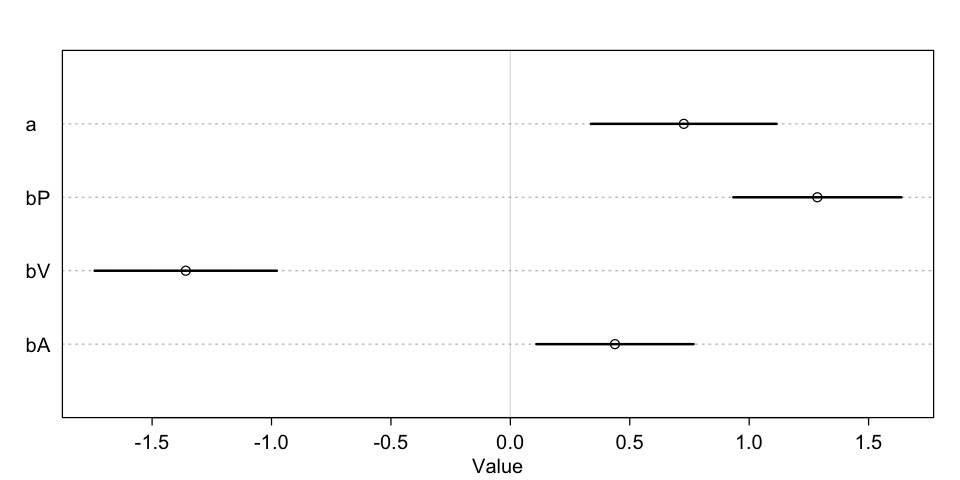

In [12]:
resize_plot(8,4)
plot(precis(eagle_q))

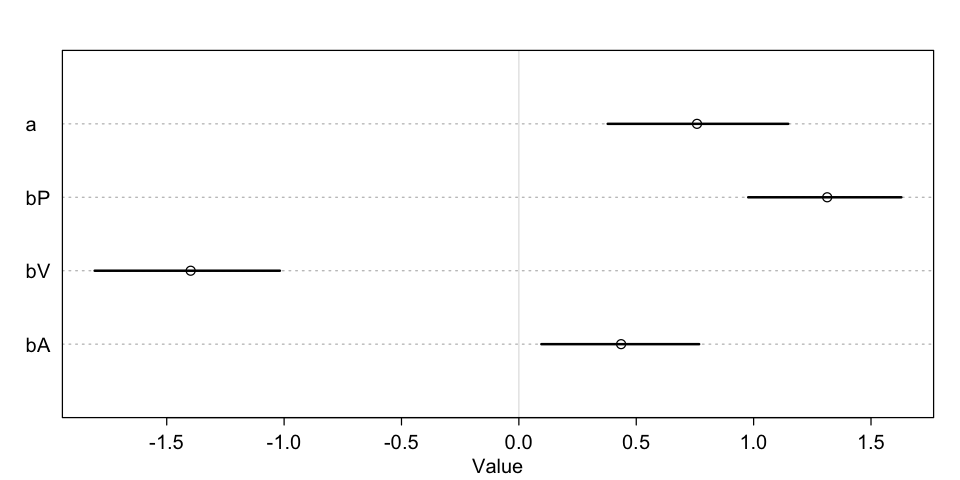

In [16]:
plot(precis(eagle_stan))

In [17]:
post <- extract.samples(eagle_q)

In [28]:
cases_p = inv_logit( link(eagle_q, data = d) )

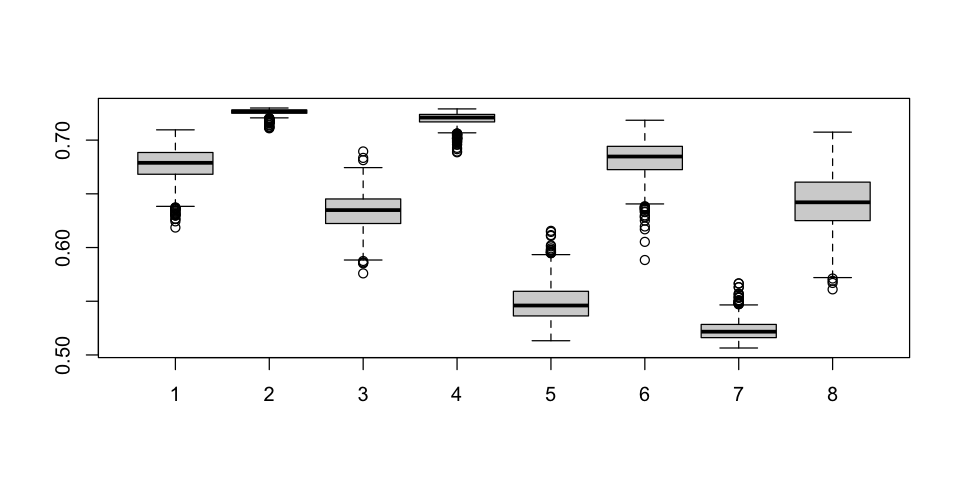

In [29]:
boxplot(cases_p)

In [22]:
d

,y,n,P,A,V
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,17,24,1,1,1
2,29,29,1,1,-1
3,17,27,1,-1,1
4,20,20,1,-1,-1
5,1,12,-1,1,1
6,15,16,-1,1,-1
7,0,28,-1,-1,1
8,1,4,-1,-1,-1


In [23]:
cases_success <- matrix(nrow = nrow(cases_p), ncol = ncol(cases_p))

for(i in 1:8)
    cases_success[,i] <- d[i,'n'] * cases_p[,i]

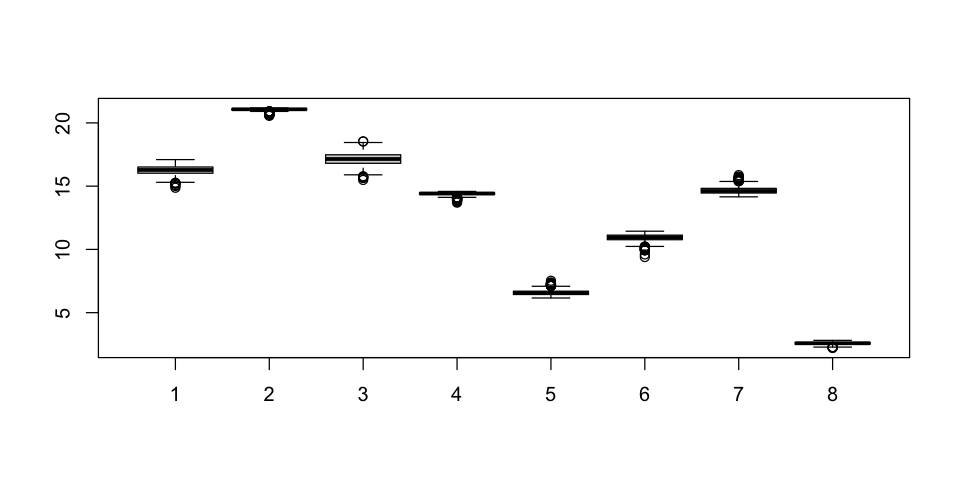

In [24]:
boxplot(cases_success)

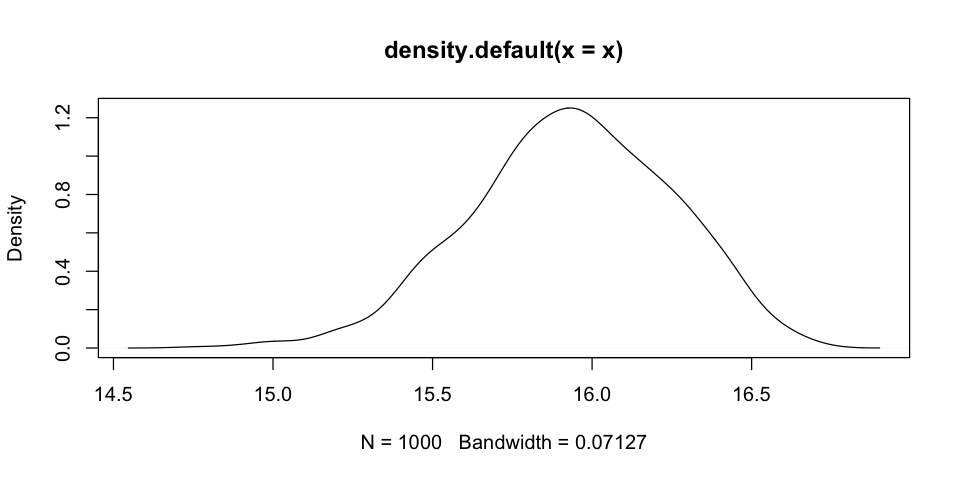

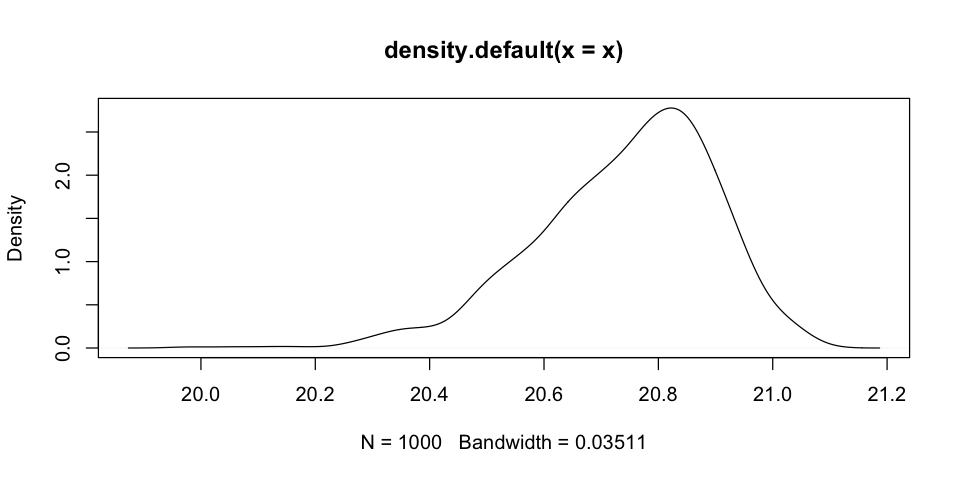

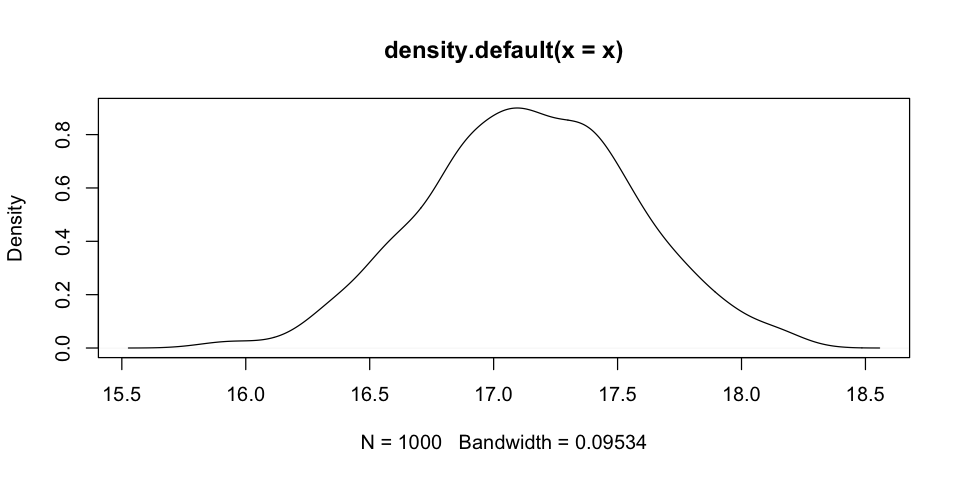

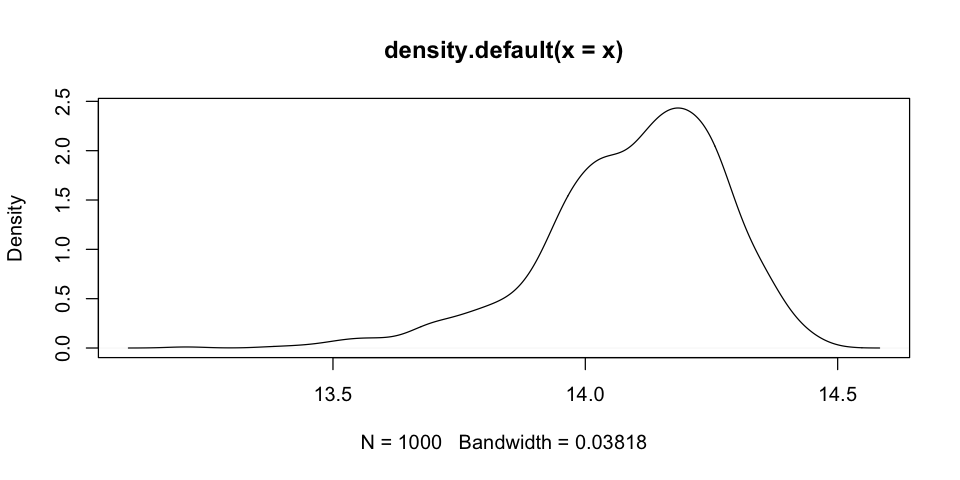

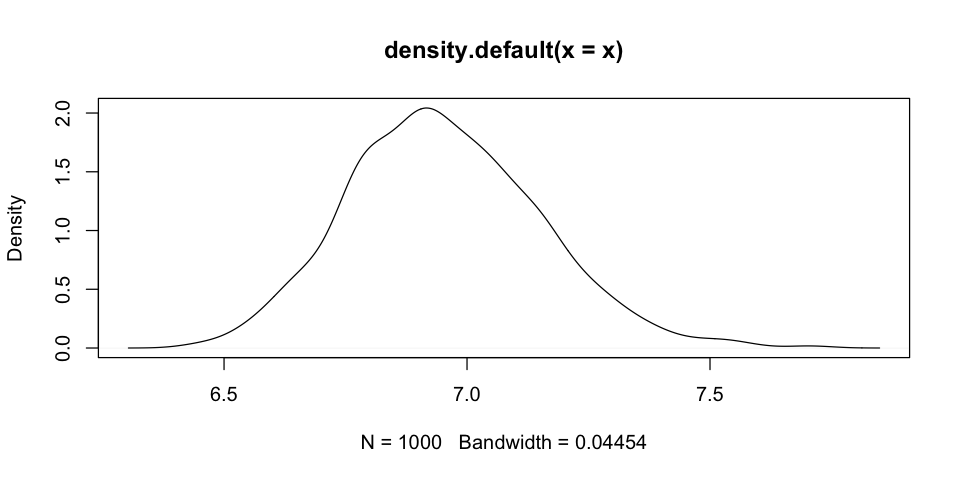

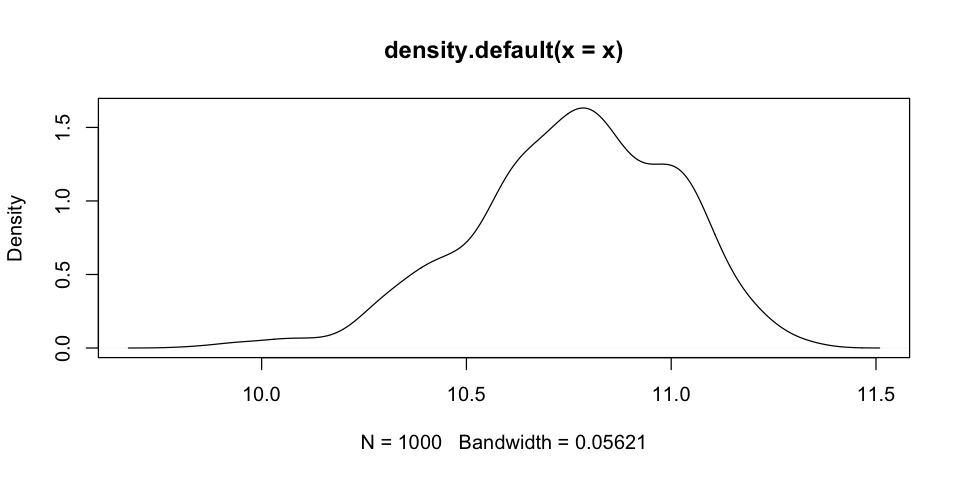

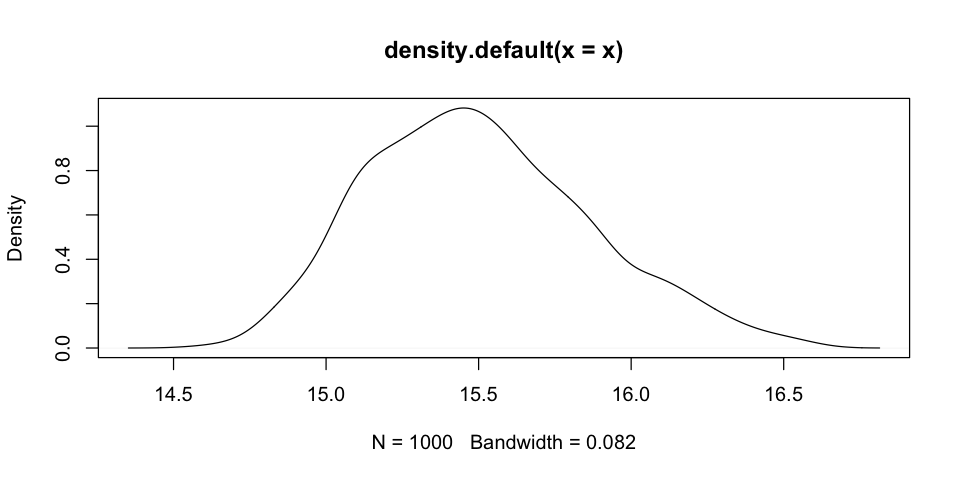

NULL

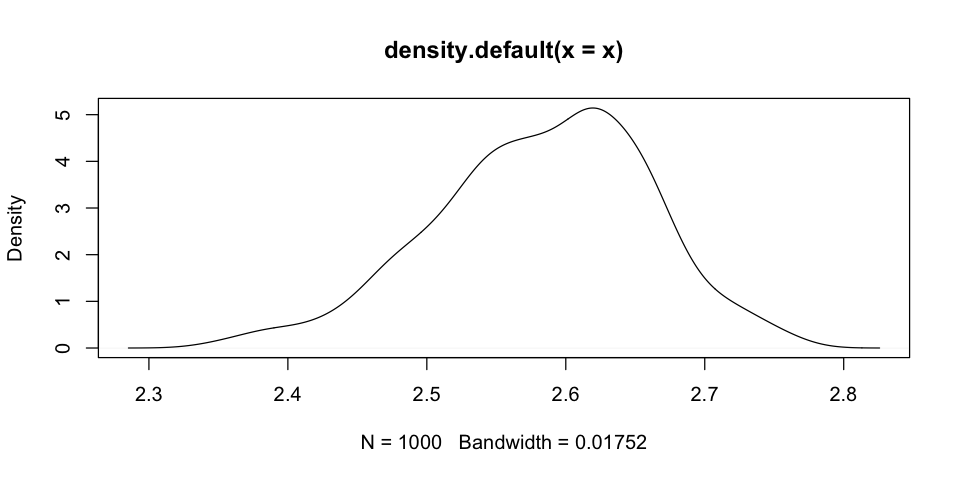

In [89]:
apply( cases_success, 2, function(x) plot(density(x)) )

In [25]:
eagle_int <- quap(
    alist(
        y ~ dbinom( n , p ) ,
        logit(p) <- a + bP * P + bV * V + bA * A + bVA * V * A,
        a ~ dnorm( 0 , 1.5 ),
        bP ~ dnorm(0, 0.5),
        bV ~ dnorm(0, 0.5),
        bA ~ dnorm(0, 0.5),
        bVA ~ dnorm(0, 0.5)
    ) , data=d)

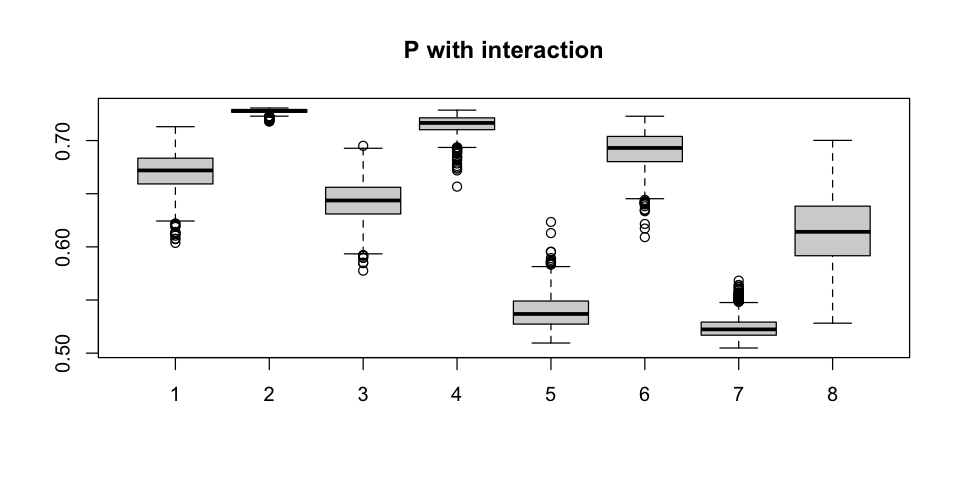

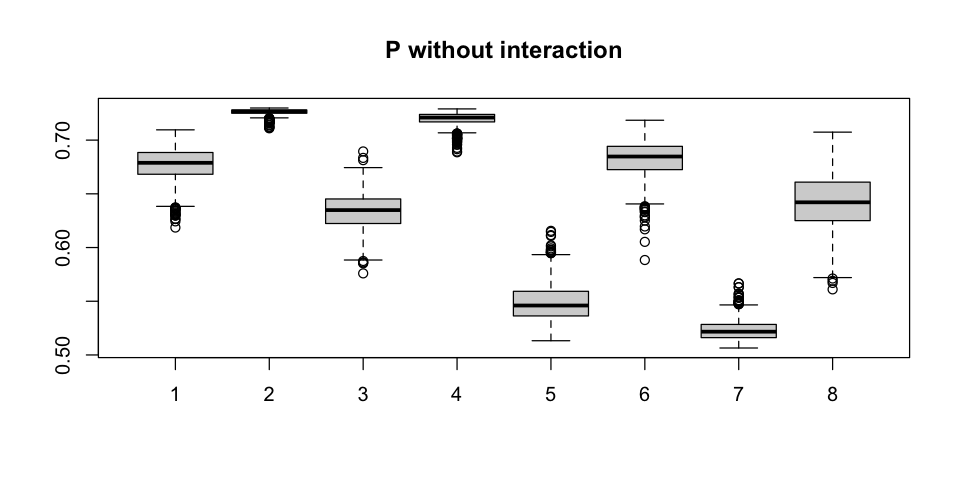

In [30]:
cases_p_int = inv_logit( link(eagle_int, data = d) )
boxplot(cases_p_int, main="P with interaction")
boxplot(cases_p, main="P without interaction")

In [31]:
post_int <- extract.samples(eagle_int)

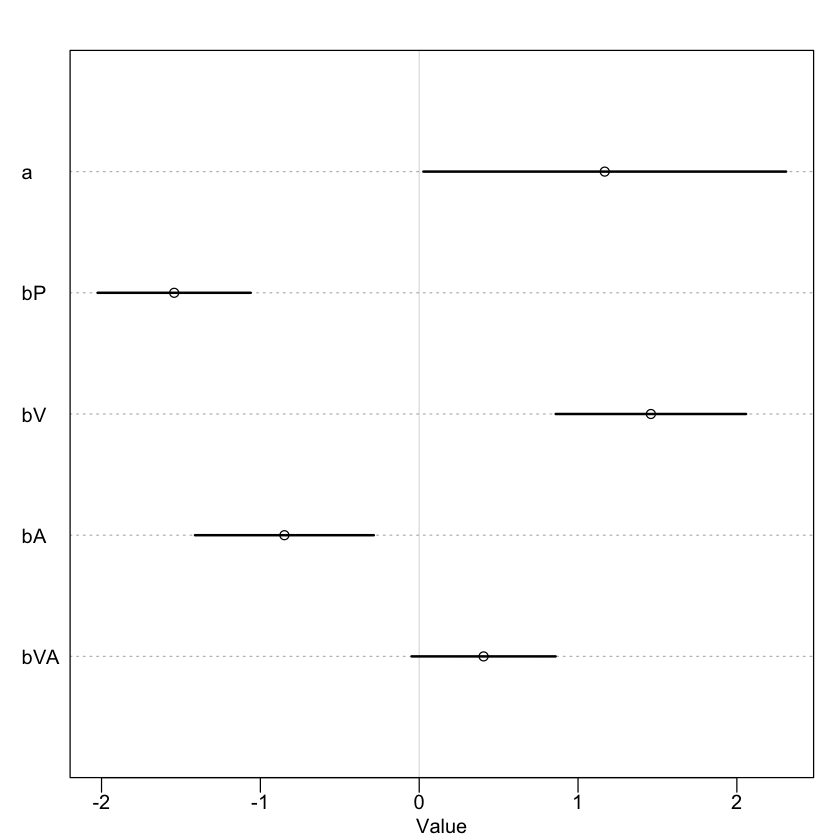

In [13]:
plot(precis(eagle_int))

In [32]:
compare(eagle_q, eagle_int)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
eagle_int,36.90128,5.513926,0.000000,NA,5.521880,0.65447
eagle_q,38.17877,5.662351,1.277492,3.51243,5.283907,0.34553


In [33]:
compare(eagle_q, eagle_int, func='PSIS')

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
eagle_q,41.40580,7.121299,0.000000,NA,6.967183,0.6276684
eagle_int,42.45025,7.590616,1.044455,3.474132,8.385562,0.3723316


In [37]:
PSIS(eagle_q, pointwise = TRUE)
PSIS_q <- PSIS(eagle_q, pointwise = TRUE)

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.



PSIS,lppd,penalty,std_err,k
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.746047,-2.3730237,0.3295547,6.862427,0.5229498
1.616149,-0.8080745,0.1454019,6.862427,0.2767799
6.180470,-3.0902349,0.8052236,6.862427,0.7878139
3.062025,-1.5310125,0.5013962,6.862427,0.7554938
4.115486,-2.0577430,0.5852850,6.862427,0.8458491
9.071983,-4.5359915,2.2054501,6.862427,0.9316798
7.605157,-3.8025785,1.5623865,6.862427,0.7811753
4.324060,-2.1620300,0.4552024,6.862427,0.1775550


Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



In [20]:
d

,y,n,P,A,V
,<int>,<int>,<int>,<int>,<int>
1,17,24,1,1,1
2,29,29,1,1,2
3,17,27,1,2,1
4,20,20,1,2,2
5,1,12,2,1,1
6,15,16,2,1,2
7,0,28,2,2,1
8,1,4,2,2,2


In [36]:
PSIS(eagle_int, pointwise = TRUE)
PSIS_int <- PSIS(eagle_int, pointwise = TRUE)

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



PSIS,lppd,penalty,std_err,k
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.613269,-2.3066345,0.3064108,7.75735,0.5533447
1.259706,-0.6298528,0.1512128,7.75735,0.6075030
5.472442,-2.7362208,0.5675856,7.75735,0.8901508
5.706102,-2.8530509,1.4527096,7.75735,0.8976825
3.188271,-1.5941354,0.3063988,7.75735,0.5348961
9.440942,-4.7204711,2.8998295,7.75735,1.4014118
8.562765,-4.2813825,1.8941411,7.75735,0.7011703
3.435394,-1.7176972,0.3999469,7.75735,0.3341853


Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



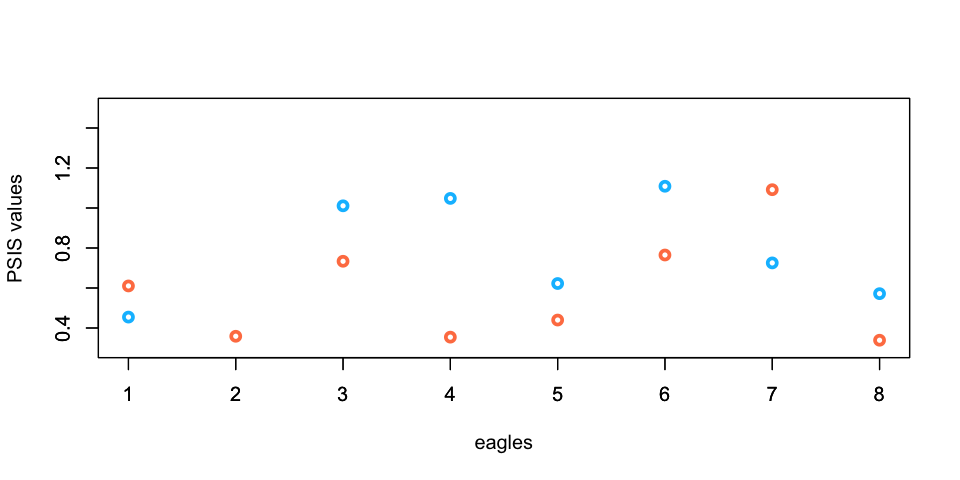

In [46]:
plot(1:8, ylim=c(.3,1.5), PSIS_q$k, lwd=3, col='coral', ylab = 'PSIS values', xlab='eagles')
par(new=TRUE)
plot(1:8, ylim=c(.3,1.5), PSIS_int$k, lwd=3, col='deepskyblue1', xlab='', ylab='',)

In [47]:
d$cases = 1:8

In [50]:
eagle_case <- quap(
    alist(
        y ~ dbinom( n , p ) ,
        logit(p) <- a[cases] + bP * P + bV * V + bA * A + bVA * V * A,
        a[cases] ~ dnorm( 0 , 1.5 ),
        bP ~ dnorm(0, 0.5),
        bV ~ dnorm(0, 0.5),
        bA ~ dnorm(0, 0.5),
        bVA ~ dnorm(0, 0.5)
    ) , data=d)

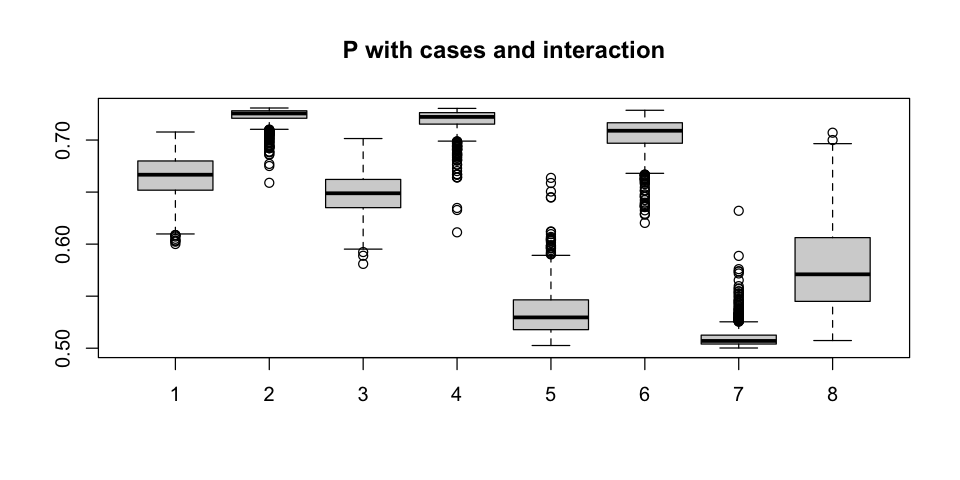

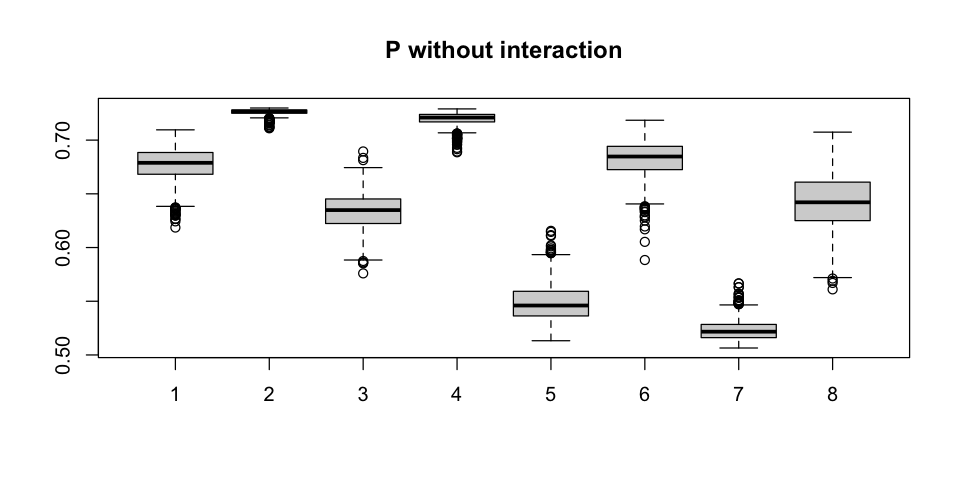

In [51]:
cases_p_case = inv_logit( link(eagle_case, data = d) )
boxplot(cases_p_case, main="P with cases and interaction")
boxplot(cases_p, main="P without interaction")

In [52]:
post_case <- extract.samples(eagle_case)

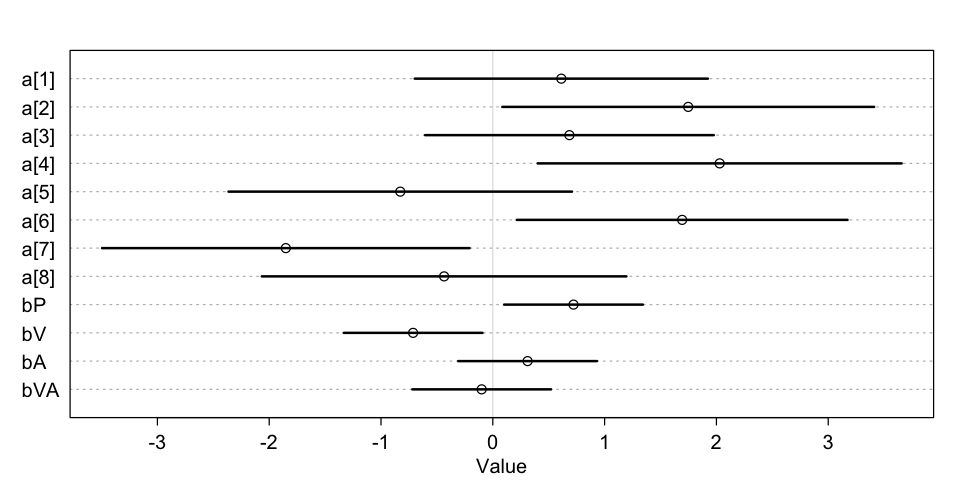

In [54]:
plot(precis(eagle_case, depth=2))

In [55]:
compare(eagle_q, eagle_case)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
eagle_case,36.40358,2.167044,0.000000,NA,7.695991,0.732794
eagle_q,38.42127,5.693985,2.017689,6.211025,5.404203,0.267206


In [56]:
compare(eagle_q, eagle_case, func='PSIS')

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
eagle_q,40.24773,6.579850,0.00000,NA,6.380645,0.994076701
eagle_case,50.49357,5.819334,10.24584,9.197675,14.694849,0.005923299


In [57]:
PSIS(eagle_q, pointwise = TRUE)
PSIS_q <- PSIS(eagle_q, pointwise = TRUE)

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



PSIS,lppd,penalty,std_err,k
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.776896,-2.3884480,0.3392290,7.572188,0.6091051
1.678515,-0.8392575,0.1762844,7.572188,0.2880979
6.617103,-3.3085516,0.9887356,7.572188,0.9554521
3.105937,-1.5529684,0.5207803,7.572188,0.6124013
3.956677,-1.9783383,0.5109782,7.572188,0.6625158
9.646175,-4.8230877,2.5370730,7.572188,1.2612812
8.285987,-4.1429937,1.9090120,7.572188,1.0452021
4.507992,-2.2539959,0.5276926,7.572188,0.2566577


Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.



In [20]:
d

,y,n,P,A,V
,<int>,<int>,<int>,<int>,<int>
1,17,24,1,1,1
2,29,29,1,1,2
3,17,27,1,2,1
4,20,20,1,2,2
5,1,12,2,1,1
6,15,16,2,1,2
7,0,28,2,2,1
8,1,4,2,2,2


In [59]:
PSIS(eagle_case, pointwise = TRUE)
PSIS_case <- PSIS(eagle_case, pointwise = TRUE)

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



PSIS,lppd,penalty,std_err,k
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.156544,-2.578272,0.5227202,10.01784,0.8801378
9.527409,-4.763704,3.9597383,10.01784,1.5516391
5.445118,-2.722559,0.5420374,10.01784,0.7166640
11.732172,-5.866086,4.9712452,10.01784,1.8692251
4.926425,-2.463213,1.2075263,10.01784,1.0805444
5.995759,-2.997880,1.6655491,10.01784,1.1812155
12.630620,-6.315310,5.4665664,10.01784,1.9757826
2.892882,-1.446441,0.3198453,10.01784,0.5469709


Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



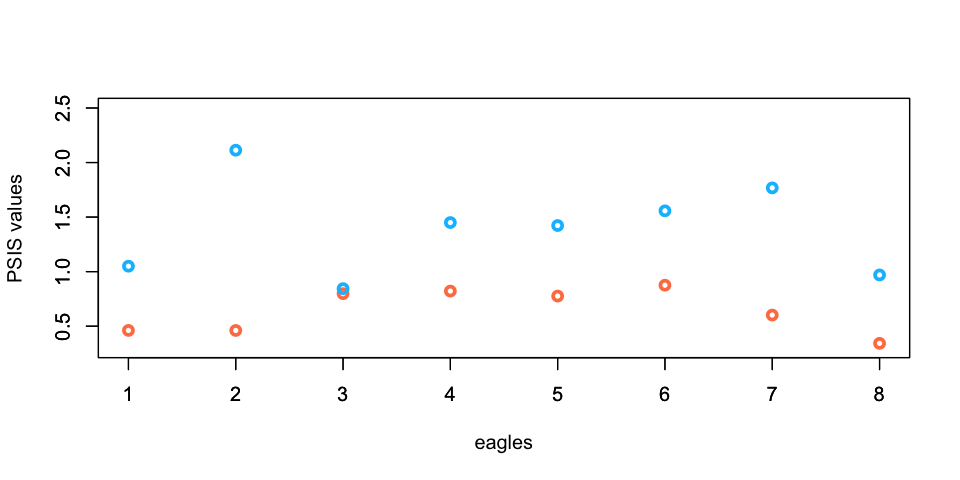

In [61]:
plot(1:8, ylim=c(.3,2.5), PSIS_q$k, lwd=3, col='coral', ylab = 'PSIS values', xlab='eagles')
par(new=TRUE)
plot(1:8, ylim=c(.3,2.5), PSIS_case$k, lwd=3, col='deepskyblue1', xlab='', ylab='',)

In [62]:
cases_success <- matrix(nrow = nrow(cases_p_case), ncol = ncol(cases_p_case))

for(i in 1:8)
    cases_success[,i] <- d[i,'n'] * cases_p_case[,i]

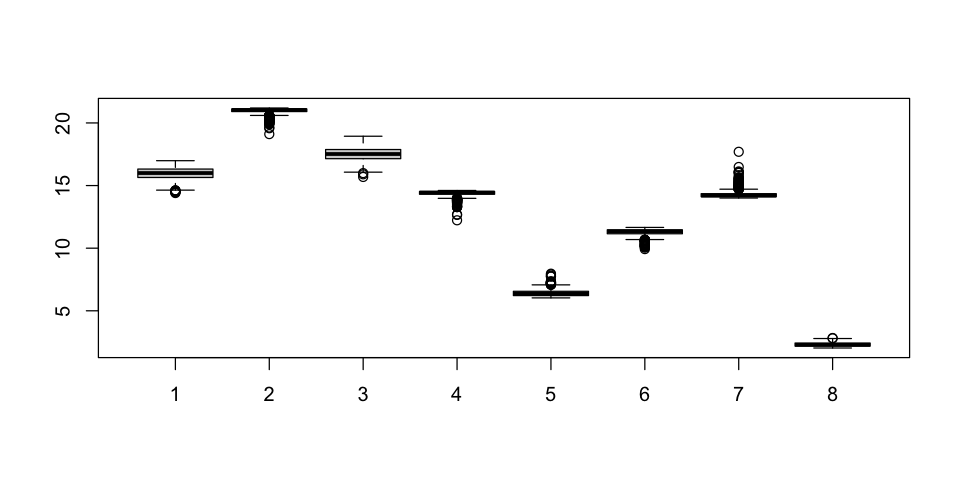

In [63]:
boxplot(cases_success)